/opt/homebrew/Caskroom/miniconda/base/envs/ai-project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


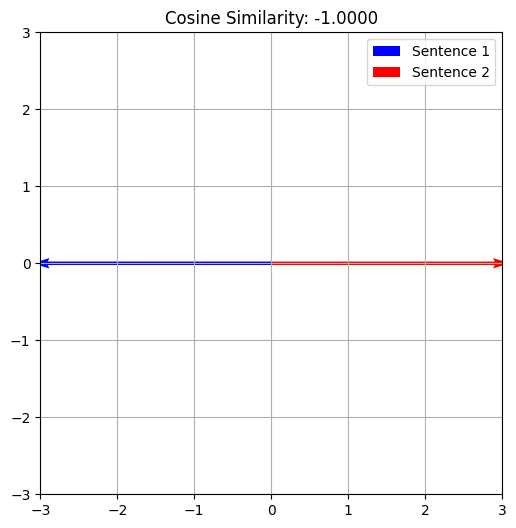

In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. 加载模型
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# 2. 输入任意两个句子
sent1 = "I love machine learning."
sent2 = "I enjoy studying artificial intelligence."

# 3. 生成 embedding
emb1 = model.encode(sent1)
emb2 = model.encode(sent2)

# 4. PCA降维到2D
pca = PCA(n_components=2)
reduced = pca.fit_transform([emb1, emb2])
v1, v2 = reduced[0], reduced[1]

# 5. 计算余弦相似度
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
sim = cosine_similarity(v1, v2)

# 6. 绘图展示
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Sentence 1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red', label='Sentence 2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal')
plt.grid(True)
plt.legend()
plt.title(f'Cosine Similarity: {sim:.4f}')
plt.show()